# Спрос на рейсы авиакомпании

Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

У вас есть файлы с результатами запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.


## 1. Аналитика

Первым делом импортируем библиотеки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Загрузим 2 DataFrame с результатами запросов.

In [2]:
df_model = pd.read_csv()
df_model.info()
df_model

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [3]:
df_city = pd.read_csv()
df_city.info()
df_city

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


## 2. Визуализация данных

Построим различные графики для наглядной демонстрации данных.

### - Модели самолётов и количество рейсов

Первым графиком покажем сколько рейсов совершил каждая модель самолета.

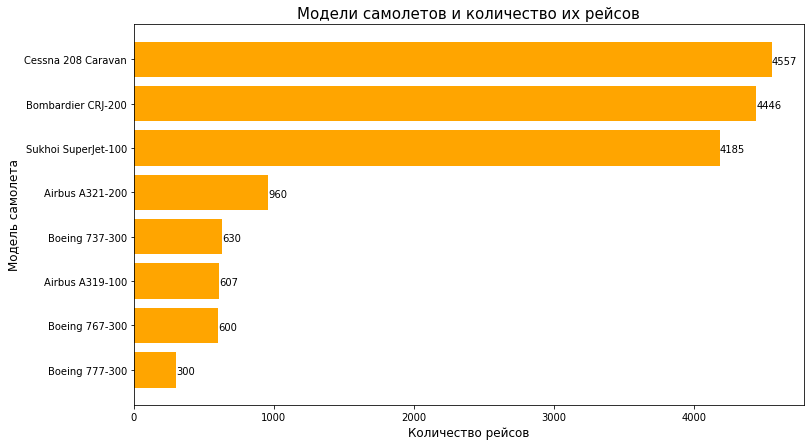

In [4]:
df_model_sort = df_model.sort_values('flights_amount')
plt.figure(figsize=(12, 7))
plt.barh(df_model_sort['model'], df_model_sort['flights_amount'], color='orange')
plt.title('Модели самолетов и количество их рейсов', size=15)
plt.xlabel('Количество рейсов', size=12)
plt.ylabel('Модель самолета', size=12)
for i, v in enumerate(df_model_sort['flights_amount']):
    plt.text(v + .9, i - .1, str(v), color='black', fontweight='normal')
plt.show()

Как видно у нас есть 3 самых часто летающих модели самолетов: 
- Cessna 208 Caravan - 4557 рейсов, 
- Bombardier CRJ-200 - 4446 рейсов, 
- Sukhoi SuperJet-10 - 4185 рейсов.

Их отрыв по количеству полетов больше чем в 4 раза, по сравнению с другими моделями самолетов. Это может быть связано с различными факторами. Например на этих моделях экономически выгоднее летать, они вмещают больше человек, расчитаты на дальние полеты, являются более надежными.

### - Города и количество рейсов

Построим график, который покажет, города и количество рейсов прилетающих в них.

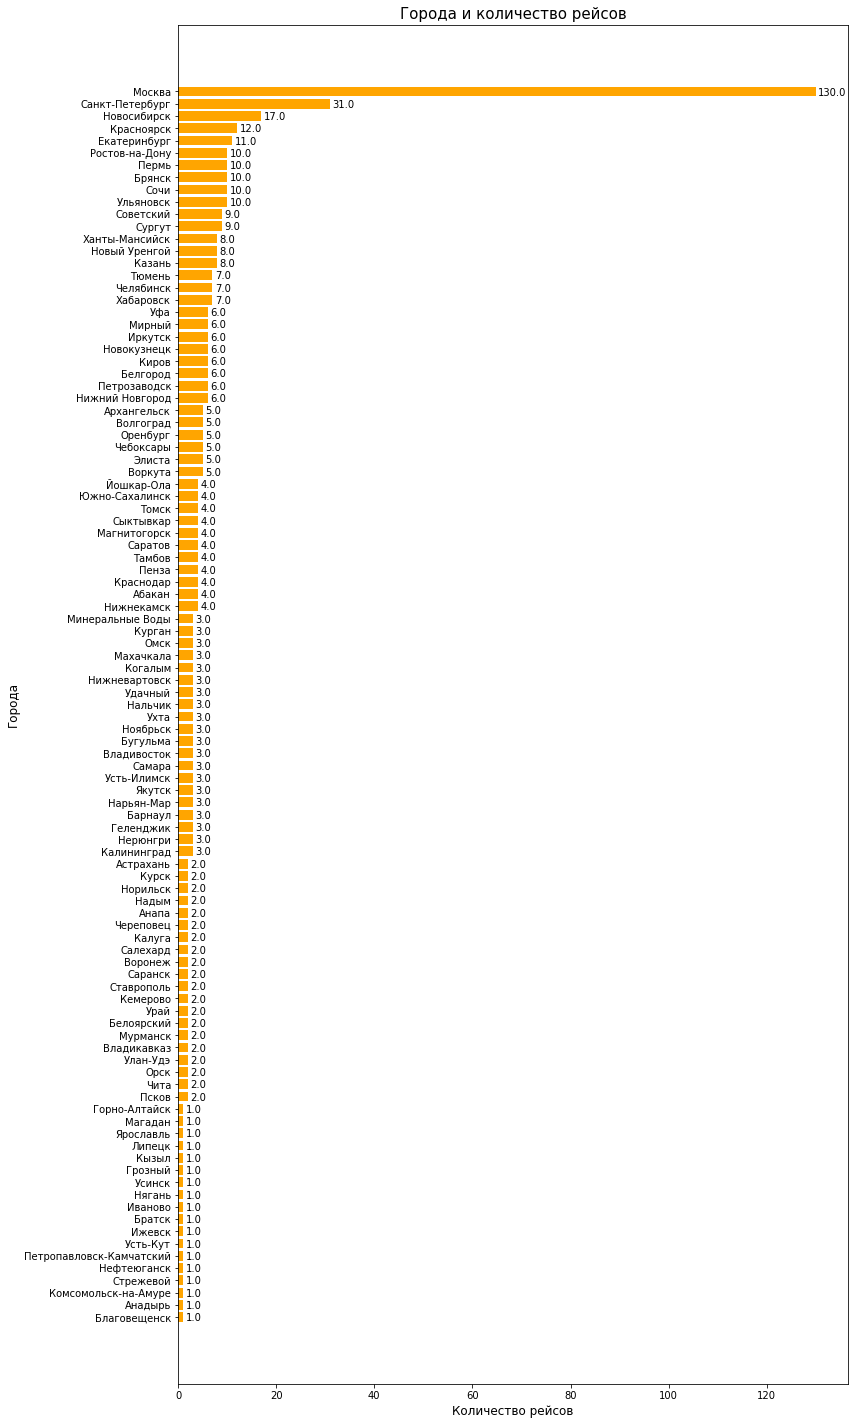

In [5]:
df_city_sort = df_city.sort_values('average_flights')
df_city_sort['average_flights'] = df_city_sort['average_flights'].round()
# для наглядности отсортируем данные по убыванию и округлим значения
plt.figure(figsize=(12, 25))
plt.barh(df_city_sort['city'], df_city_sort['average_flights'], color='orange')
plt.title('Города и количество рейсов', size=15)
plt.xlabel('Количество рейсов', size=12)
plt.ylabel('Города', size=12)
for i, v in enumerate(df_city_sort['average_flights']):
    plt.text(v + .5, i - .3, str(v), color='black', fontweight='normal')
plt.show()

Видно, что есть города, в которые прибывает 1 - 2 рейса в день. Это могу быть города, которые расположены в трудно доступных местах, города с маленьким аэродромом и не предназначенные для больших самолетов, "не популярные" города, в следствии чего часто летать в них экономически невыгодно.

In [6]:
df_city.query('average_flights <= 2').count()

city               31
average_flights    31
dtype: int64

Городов, где 1-2 рейса в день, в нашем списке 31 город. Получается в России 31 город, куда не часто летают рейсы.

### - Топ 10 городов и количество рейсов

Теперь переёдем к более детальному изучению городов, так как их у нас 100, то выделим 10 самых посещяемых городов и будем на этих городах проводить анализ.

In [7]:
df_city_10 = df_city.nlargest(10, 'average_flights')
df_city_10

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


Как видно Москва самый популярный город среди Топ 10 самых посещаемых городов.

In [8]:
print('Количество рейсов в города со 2 по 10 место в Топ 10 самых посещаемых городов = {:.2f}'
      .format(sum(df_city_10['average_flights'][1:10])))

Количество рейсов в города со 2 по 10 место в Топ 10 самых посещаемых городов = 120.90


Даже сумма количества рейсов всех остальных 9 городов не дает значение больше чем Москва.

In [9]:
print('{:.2%} рейсов приходится на Москву'.format(sum(df_city_10['average_flights'][:1]) / sum(df_city_10['average_flights'])))

51.77% рейсов приходится на Москву


Как видно больше половины рейсов из общего количества прилетает в Москву. Можно сказать каждый второй самолет в России летит в Москву.

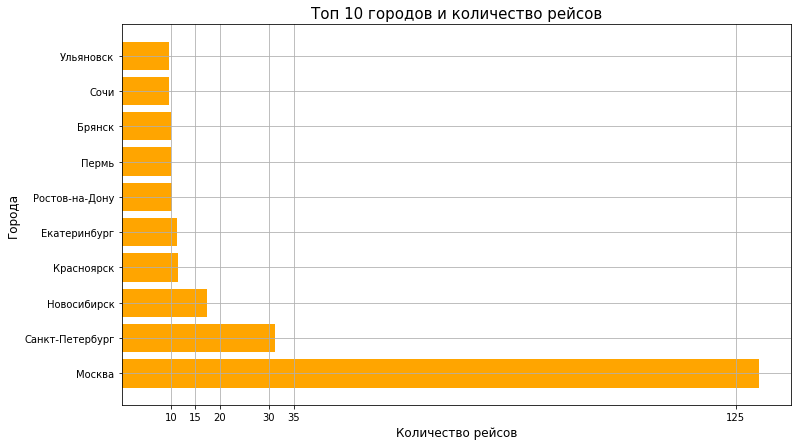

In [10]:
plt.figure(figsize=(12, 7))
plt.barh(df_city_10['city'], df_city_10['average_flights'], color='orange')
plt.xticks([10, 15, 20, 30, 35, 125])
plt.grid(True)
plt.title('Топ 10 городов и количество рейсов', size=15)
plt.xlabel('Количество рейсов', size=12)
plt.ylabel('Города', size=12)
plt.show()

Как не странно, первые 3 места занимают города, которые расположены в таком же порядке и по численности их населения. Можно сделать вывод, что эти 10 городов являются самыми экономически значеными для странны, и в этих городах "крутятся" большая часть денег. Также можно сказать, что сообщения между этими городами является подобием артерий в теле человека, только гоняют не кров, а деньги.